<a href="https://colab.research.google.com/github/JunadQuasir/Cardiovascular_Risk_Prediction-/blob/main/Cardiovascular_Risk_Prediction_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Cardiovascular Risk Prediction**



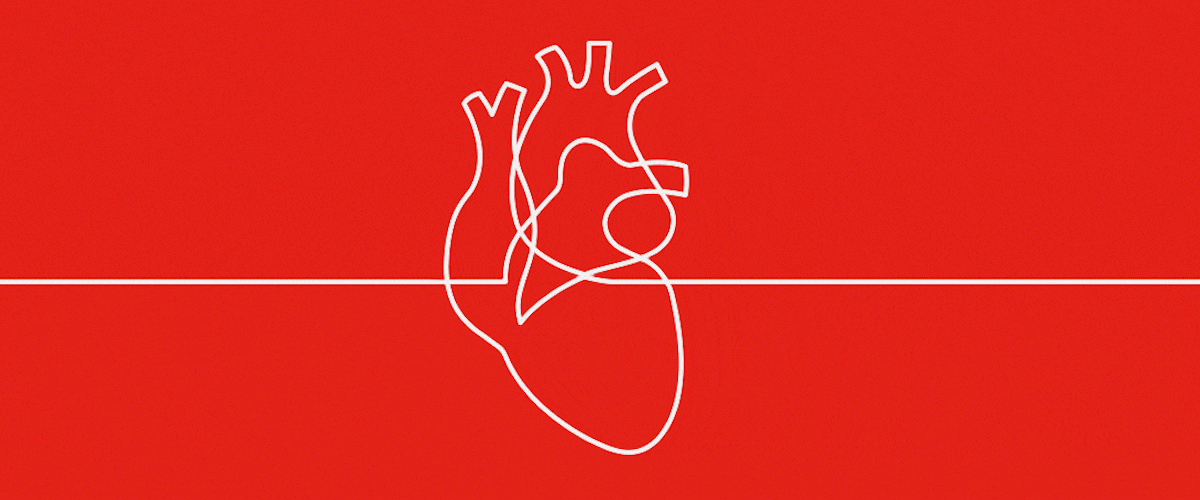

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**            - Junad Quasir


# **Project Summary -**

This project is based upon a medical domain dataset, and it has been collected from various patients. It includes entries of over 3000 patients and has 16 different attributes for the prediction of Coronary Heart Diseases in patients for the next 10 years.

# **GitHub Link -**

https://github.com/JunadQuasir/Cardiovascular_Risk_Prediction-


# **Problem Statement**


**Cardiovascular diseases (CVDs) are the leading* cause of death globally, taking an estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.*

More than four out of five CVD deaths* are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.*

The most important behavioural risk factors* of heart disease and stroke are unhealthy diet, physical inactivity, tobacco use and harmful use of alcohol.*

Over three quarters* of CVD deaths take place in low- and middle-income countries.***

#### **Define Your Business Objective?**

The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD) considering the other features.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter

%matplotlib inline

### Dataset Loading

**Mounting the drive to access the dataset**

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/classification project 3/data_cardiovascular_risk.csv',encoding ='latin')

### Dataset First View

In [ ]:
# Dataset First Look
df.head(5)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)
df.value_counts()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(df)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe()

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
df_col=df.columns


In [ ]:
data_columns_list = df.columns.to_list()
for i in data_columns_list:
  print('\033[1m'+'\n\nThe Unique Values in'+'\033[0m','\033[1m'+ i+'\033[0m', 'are:',df[i].unique())


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Handling null value from the dataset
df.isna().sum()

In [ ]:
df = df.dropna(how = "any")

# Checking if there's still any null values left.
df.isna().sum()
     

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
# Dropping the "id" column.
df = df.drop(columns=['id'])

In [ ]:
# handling outliers
plt.figure(figsize=(20,8))
df.boxplot()

In [ ]:
df.info()

In [ ]:
df.head(3)

In [ ]:
df['sex'].replace(to_replace='M',value=1,inplace=True) ## sex=male,numerical=1
df['sex'].replace(to_replace='F',value=0,inplace=True)  ## sex =female,numerical=0

In [ ]:
# changeing categorical feature to numerical
df['is_smoking'].replace(to_replace='YES',value=1,inplace=True)## somking =yes ,numerical=1
df['is_smoking'].replace(to_replace='NO',value=0,inplace=True)## smoking  =no,numerical=0

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization & Explorationy data analysis(EDA)***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
my_palette = {0 : 'orange' , 1 : 'teal'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (10,10))
sns.countplot(x = df['sex'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable

##### 2. What is/are the insight(s) found from the chart?

male gender is prone to coronary heart disease 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

hospital have to give more importance to male gender then femal gender

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x =df['diabetes'], hue =df['TenYearCHD'], palette = my_palette)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()
     

##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable

##### 2. What is/are the insight(s) found from the chart?

diabetic are not much impacting for coronory heart disease

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Diabetic are not much more import then other disease to impact so focusing on other disease to check the corocory

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize = (10,10))
ax = sns.boxplot(x = df['sex'], y = df['age'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which Age Group which is more impact to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

##### 2. What is/are the insight(s) found from the chart?

Age group which is more vulnerable to CHD is Male because it start at the age of 47 and for female is 50

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Age group which is more vulnerable to CHD is Male because it start at the age of 47 and for female is 50.Focusing on Male members because it start earlier the female

#### Chart - 4

In [ ]:
#Plotting the count plot for 	prevalentHyp	 vs 	prevalentHyp	 with target variable.
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df['prevalentHyp'], ax=ax)
sns.countplot(df['prevalentHyp'], hue=df['TenYearCHD'],ax=ax)
plt.xlabel('	prevalentHyp	')
plt.title('Count plot of 	prevalentHyp with Target Variable')

##### 1. Why did you pick the specific chart?

counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so you can compare counts across nested variables.

##### 2. What is/are the insight(s) found from the chart?

The plot shows the count of patients who are hypertensive is quite high than the non-hypertensive patients but by looking at both of the sides we can observe that the patients who are hypertensive are at high risk of CHD.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

hypertensive is quite high than the non-hypertensive patients but by looking at both of the sides we can observe that the patients who are hypertensive are at high risk of CHD.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
#Plotting count plot of age with target variable.
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df['age'], ax=ax, palette='pastel')
sns.countplot(df['age'], hue=df['TenYearCHD'],ax=ax, palette='bright')
plt.xlabel('Age')
plt.title('Count plot of Age with Target Variable')

##### 1. Why did you pick the specific chart?

counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so you can compare counts across nested variables.

##### 2. What is/are the insight(s) found from the chart?

In this graph we can see that,between 32 to 40 there is less chance of CHDs.

After 40 there is an increase in CHDs and between 51 to 63 the graph shows highest chance of CHDs and after 63 the chance of CHDs is Decreasing as age increases.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
#plotting the boxplot between sex variable and BMI variable with target class
plt.figure(figsize=(12,8))
sns.violinplot(data=df,x='sex', y='BMI',hue="TenYearCHD",palette = 'magma')
plt.title("Distributions of BMI Vs Gender with Target class",fontsize=15)

##### 1. Why did you pick the specific chart?

A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data.

##### 2. What is/are the insight(s) found from the chart?

In this above plot on x axis 0 represents female and 1 represents male, we can say that Female BMI is more than male BMI that leads to overweight.So,Female CHD is more than male CHD in our dataset.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Female CHD is more than male CHD in our dataset.Focusing on female CHD to get rid of risk

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
#plotting the boxplot between sex variable and totChol variable with target class
plt.figure(figsize=(12,8))
sns.violinplot(data=df,x='sex', y='totChol',hue="TenYearCHD",palette = 'crest_r')
plt.title("Distributions of Gender Vs Total Cholesterol with Target class",fontsize=15)
     

##### 1. Why did you pick the specific chart?

A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data.

##### 2. What is/are the insight(s) found from the chart?

Female has more cholesterol as compared to male. so, it can cause your blood vessels to narrow and increases your risk of developing a blood clot. In simple terms,more cholesterol leads to increase in CHD problems.

#### Chart - 8 Univariate Analysis

In [ ]:
# Chart - 8 visualization code
# Visualizing the mean and median lines for various attributes, 
# along with their distribution graphs.
plt.figure(figsize=(18,16))

# Making subplots for all the features to represent their mean, median and distributions
for i, column in enumerate(df.columns):
  feature = df[column]
  ax=plt.subplot(5, 4, i+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()
     

##### What is/are the insight(s) found from the chart?

Age ranges from 35 years to 70 years and is almost normally distributed, with most people belonging to an age group of 40.

Cigarettes smoked per day on an average are mainly 0, but 20 cigarettes a day are also prevalent.

Cholestrol ranges form 100 to 700, with most belonging to 150 to 350.

Systolic BP ranges mainly from 100 to 200.

Diastolic BP ranges mainly from 60 to 120.

BMI ranges mainly from 16 to 40.

Heart rate ranges from 40 to 110 and most occurances are around 75.

Glucose ranges mainly from 50 to 125, rest seem like outliers with extreme numbers but cannot be ignored as these numbers can cause risk of heart disease.

##### Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can understand from the data that, it has wide range of numbers, which indicates that both healthy and unhealthy people are considered. To get a clear understanding of risk of heart disease all these categories play an important role, especially those which are on the higher end as these extreme numbers may make a person more vulnerable to heart disease.

#### Chart - 9 Bivariate Analysis

In [ ]:
# Chart - 9 visualization code
independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]

# defining figure.
plt.figure(figsize=(18,18))

# making subplots for all independent variables vs TenYearCHD(dependent variable).
for n, column in enumerate(df.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df[column], y =df['TenYearCHD'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

# **chart 10 - pair plot**

In [ ]:
# Correlation Heatmap visualization code
sns.pairplot(data=df)

The above Pairplot explains bivariate analysis for all the numerical columns, we can understand that:
As cholestrol is low the systolic BP also remains low.

Systolic BP and diastolic BP have a positive relationship.

Most of the cases, less cholestrol means less glucose

Diastolic BP, systolic BP and BMI have a slight positive relationship.

#### Chart - 11- correlation heatmap

In [ ]:
# visualization code
plt.figure(figsize = (10,10))
sns.heatmap(data=df.corr(),annot=True)

#####  What is/are the insight(s) found from the chart?

Highest correlation exists between systolic BP and diastolic BP.

Systolic and Diastolic BP influece hypertension and BMI.

Systolic BP and age have a positive correleation.

Variables such as age, prevalent hypertension, systolic BP, diastolic BP, and glucose influence the risk of heart disease mainly.

All the variables have a positive correlation with the dependent variable, except for education, by a very small value.

##**Feature Engineering & Data Pre-processing**

In [ ]:
# Chacking outliers
# Box plot distributions for numeric features.
# Define a figure.
plt.figure(figsize=(14,12))

# plotting subplots for every numeric feature.
for i,column in enumerate(df):
  plt.subplot(5, 4, i+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}', weight='bold')
  plt.tight_layout()

We can see a lot of outliers in columns like, Totchol, SysBP, DiaBP, BMI, Glucose, etc

In [ ]:
# Dropping rows with Cigarette per day greater than 50.
df = df[df["cigsPerDay"] <= 50]
# Dropping rows with DiaBp greater than 140.
df = df[df['diaBP'] <= 140]
# Dropping rows with SysBP greater than 250.
df = df[df['sysBP'] <= 250]
# Dropping rows with BMI greater than 50.
df = df[df['BMI'] <= 50]
# Dropping rows with heart rate greater than 130.
df = df[df["heartRate"] <= 130]
# Dropping rows with glucose greater than 300.
df = df[df["glucose"] <= 300]
# Dropping rows with total cholesterol greater than 500.
df = df[df["totChol"] <= 500]

**Systolic and Diastolic blood pressure has a high correlation that can be commonly classified into hypertension.**

In [ ]:
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

In [ ]:
df['Hypertension'] = df.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
df.head()
     

**Blood glucose levels can be used to classify the severity of Diabetes.**

In [ ]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'   

In [ ]:
df['Diabetes'] = df['glucose'].apply(lambda x: diabetes_grade(x))
df.head()

In [ ]:
#checking corelation after adding new features
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True)

In [ ]:
# checking vif

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['sysBP', 'diaBP', 'glucose', 'diabetes', 'is_smoking', 'cigsPerDay']]])

In [ ]:
df.drop(columns=['sysBP', 'diaBP', 'glucose', 'diabetes', 'is_smoking', 'cigsPerDay'], inplace=True)
     

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True)

# **Model Development**

Now its time to implement the Machine Learning models and check the accuracy of each model to point out the best one out of all. In this project we are implementing 8 machine learning algorithms to predict the target variable and also we'll apply optimization techniques to get the best resulting accuracy.

**Prerequisites**

Now that the Dataset is cleaned and we have added all the neccessary features along with some conversions of categorical features. Its time to split the data into training and testing sets.

Note:- These training and testing data are going to be same for all the model we'll build such that all of the models are evaluated on a same set of parameters.

In [ ]:
# Splitting the data into set of independent variables and a dependent variable.
X = df.drop('TenYearCHD',axis=1).values
y = df['TenYearCHD'].values

**Checking data imbalance**

In [ ]:
df['TenYearCHD'].value_counts()

In [ ]:
plt.figure(figsize=(7,5), dpi=100)
proportion = df['TenYearCHD'].value_counts()
labels = ['SAFE','AT RISK']
plt.title('Proportion of Safe and at Risk for Target Feature')
plt.pie(proportion, explode=(0,0.2),labels=labels, shadow = True, autopct = '%1.1f%%')
plt.legend()
plt.show()

In [ ]:
#import library for 3 class classification

from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()

X_smote, Y_smote = oversample.fit_resample(X, y)
     

We have used SMOTE to handle our imbalanced dataset. It is an algorithm used to balance class distributions in a dataset. In machine learning, it is often the case that a dataset is imbalanced, meaning that one class of data points occurs much more frequently than the other(s).

We have used SMOTE because of the following reasons:

1.   It increases the minority class without creating duplicates.
2.   It can balance the class distribution by either over-sampling the minority class or under-sampling the majority class.
3.   It can be used to prevent overfitting on imbalanced datasets.






# **Data Splitting**

In [ ]:
# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=.25, random_state=42)


# **ML Model Implementation**

**1. Applying Logistic Regression**

Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# classification Ml models
lr= LogisticRegression()

In [ ]:
# Fitting the logistic regression model
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
lr_accuracy = accuracy_score(y_test, y_pred)
lr_accuracy_train= accuracy_score(y_train, y_pred_train)

In [ ]:
# Calculating accuracy on test data

print('Accuracy score of the  = ', lr_accuracy)
print('Accuracy score of the train  = ', lr_accuracy_train)

In [ ]:
# Printing evaluation metric score chart
print(classification_report(y_pred, y_test))
print(classification_report(y_train, y_pred_train))

In [ ]:
## Plotting confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title('Confusion Matrix for Test predict')

In [ ]:
## Plotting confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)
plt.title('Confusion Matrix for Train predict')

**K-Nearest Neighbour (KNN)**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Calculate the accuracy of the model
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
knn_accuracy= accuracy_score(y_test, y_pred)
knn_accuracy_train= accuracy_score(y_train, y_pred_train)

In [ ]:
print('Accuracy score of the  = ', knn_accuracy)
print('Accuracy score of the train = ', knn_accuracy_train)

In [ ]:
# Printing evaluation metric score chart
print(classification_report(y_pred, y_test))

print(classification_report(y_train, y_pred_train))

In [ ]:
## Plotting confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
## Plotting confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)
plt.title('Confusion Matrix for Train predict')

**Naive Bayes Classifier**

In [ ]:

# Creating naive bayes model 
gnb = GaussianNB()

gnb.fit(X_train, y_train)
  
# Calculate the accuracy of the model
y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)
gnb_accuracy = accuracy_score(y_test, y_pred)
gnb_accuracy_train= accuracy_score(y_train, y_pred_train)

In [ ]:
print('Accuracy score of the  = ', gnb_accuracy)
print('Accuracy score of the train = ', gnb_accuracy_train)

In [ ]:
# Printing evaluation metric score chart
print(classification_report(y_pred, y_test))

print(classification_report(y_train, y_pred_train))

In [ ]:
## Plotting confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

**SVM**

In [ ]:
#Create a svm Classifier
from sklearn.svm import SVC
svmc = SVC(kernel='poly') # Polynomial Kernel

svmc.fit(X_train, y_train)
  
# Calculate the accuracy of the model
y_pred = svmc.predict(X_test)
y_pred_train = svmc.predict(X_train)
svmc_accuracy = accuracy_score(y_test, y_pred)
svmc_accuracy_train= accuracy_score(y_train, y_pred_train)

In [ ]:
print('Accuracy score of the  = ', svmc_accuracy)
print('Accuracy score of the train = ', svmc_accuracy_train)

In [ ]:
# Printing evaluation metric score chart
print(classification_report(y_pred, y_test))
print(classification_report(y_train, y_pred_train))

In [ ]:
## Plotting confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
## Plotting confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)
plt.title('Confusion Matrix for Train predict')

**XGBOOST CLASSIFIER**

In [ ]:
# Implementing the XGBoost classifier model
XGC= xgb.XGBClassifier(objective='binary:logistic',colsample_bytree = 0.7, learning_rate = 0.01,
                max_depth = 10, alpha = 10, n_estimators = 10,subsample=1)

# Fitting the training set 
XGC.fit(X_train, y_train)
  
# Calculate the accuracy of the model
y_pred = XGC.predict(X_test)
y_pred_train = XGC.predict(X_train)
XGC_accuracy = accuracy_score(y_test, y_pred)
XGC_accuracy_train= accuracy_score(y_train, y_pred_train)

In [ ]:
print('Accuracy score of the  = ', XGC_accuracy)
print('Accuracy score of the train = ', XGC_accuracy_train)

In [ ]:
# Printing evaluation metric score chart
print(classification_report(y_pred, y_test))
print(classification_report(y_train, y_pred_train))

In [ ]:
## Plotting confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
## Plotting confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)
plt.title('Confusion Matrix for Train predict')

**DECISION TREE CLASSIFIER**

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes= 50,random_state=0)


# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
clf_accuracy = accuracy_score(y_test, y_pred)
clf_accuracy_train= accuracy_score(y_train, y_pred_train)

In [ ]:
print('Accuracy score of the  = ', clf_accuracy)
print('Accuracy score of the train = ', clf_accuracy_train)

In [ ]:
print(classification_report(y_pred, y_test))
print(classification_report(y_train, y_pred_train))

In [ ]:

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,filled=True)

**RandomForestClassifier**

In [ ]:
classifier = RandomForestClassifier(n_estimators=100,max_depth=15,random_state=30,min_samples_split=3,criterion='entropy')

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
classifier_accuracy = accuracy_score(y_test, y_pred)
classifier_accuracy_train= accuracy_score(y_train, y_pred_train)

In [ ]:
print('Accuracy score of the  = ', classifier_accuracy)
print('Accuracy score of the train = ', classifier_accuracy_train)

In [ ]:
# Printing evaluation metric score chart
print(classification_report(y_pred, y_test))
print(classification_report(y_train, y_pred_train))

In [ ]:
## Plotting confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
## Plotting confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)
plt.title('Confusion Matrix for Train predict')

In [ ]:
from prettytable import PrettyTable
# Summarizing the results obtained
test = PrettyTable(['Sl. No.','Classification Model', 'Train Recall (%)','Test Recall (%)'])
test.add_row(['1','Logistic Regression',lr_accuracy_train*100,lr_accuracy*100])
test.add_row(['2','K Nearest Neighbors',knn_accuracy_train*100,knn_accuracy*100])
test.add_row(['3','Naive Bayes',gnb_accuracy_train*100,gnb_accuracy*100])
test.add_row(['4','Support Vector Machines',svmc_accuracy_train*100,svmc_accuracy*100])
test.add_row(['5','XGBOOST CLASSIFIER',XGC_accuracy_train*100,XGC_accuracy*100])
test.add_row(['6','DecisionTreeClassifier',clf_accuracy_train*100,clf_accuracy*100])
test.add_row(['7','RandomForestClassifier',classifier_accuracy_train*100,classifier_accuracy*100])
print(test)
     

In [ ]:
ML_models = ['Logistic Regression','K Nearest Neighbors','Naive Bayes','Decision Tree','Support Vector Machines','Random Forests','XG Boost']
train_recalls = [lr_accuracy_train,knn_accuracy_train,gnb_accuracy_train,clf_accuracy_train,svmc_accuracy_train,classifier_accuracy_train,XGC_accuracy_train]
test_recalls = [lr_accuracy,knn_accuracy,gnb_accuracy,clf_accuracy,svmc_accuracy,classifier_accuracy,XGC_accuracy]

X_axis = np.arange(len(ML_models))

plt.figure(figsize=(10,5))
plt.barh(X_axis - 0.2, train_recalls, 0.4, label = 'Train Recall')
plt.barh(X_axis + 0.2, test_recalls, 0.4, label = 'Test Recall')
  
plt.yticks(X_axis,ML_models)
plt.xlabel("Accrucy score")
plt.title("Accrucy score for each model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.show()

# **Feature importance**

In [ ]:

orig_feature_names = list(df.columns)
orig_feature_names.remove('TenYearCHD')
XGC.get_booster().feature_names = orig_feature_names
ax = xgb.plot_importance(XGC)
ax.figure.set_size_inches(10, 10)
plt.show()

# **Conclusion**


As conclusion to the project, I would like to summarize the process and some details of the project.

The data was cleaned, an EDA was performed, transformation of data was done in order to ensure it fits well into machine learning models, modelling along with evaluation of the models was done and finally hyperparameter tuning was done in an attempt to imporve the model.

5 models were used in the project, namely, Logistic Regression, Random Forest, XGB Classifier, KNN and SVM. Random Forest was best performing base model. Hyperparameter tuning was done on the same model.

The final results of the model are almost close to the base model and we have acheived almost 90% test accuracy and test precision, where as we have acheived almost 88% test recall.


Other methods or models could be used to further improve the model. With the help of a medical expert we could engineer more features which would in turn help improve the model further.

# **REFERENCES**

GeekforGeeks



Towards data science

Analytics Vidhya

ProjectPro

Kaggle

W3 school

Pythonguides

Stackoverflow

Python libraries technical documentation

Krish Naik on Youtube


3blue1brown on Youtube